# Librerie


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Dati


In [39]:
# Caricare il DataFrame da un file JSON
df = pd.read_json('df_test.json', orient='records', lines=True)
dv = pd.read_json('flawfinder_predictions.json', orient='records', lines=True)
df.head()

,_id,target
0,6527b17999826ba7e58ebd4c,1
1,6527b2c499826ba7e592f60d,0
2,6527b1ea99826ba7e5900fe3,0
3,6527b2b199826ba7e592ab24,0
4,6527b18899826ba7e58edae0,1


In [40]:
dv.head()

,nome_func,target
0,6527b17999826ba7e58ebd4c,0
1,6527b2c499826ba7e592f60d,0
2,6527b1ea99826ba7e5900fe3,0
3,6527b2b199826ba7e592ab24,0
4,6527b18899826ba7e58edae0,0


In [41]:
# Caricare array numpy da un file
codeBERT_predictions = np.load('codeBERT_predictions.npy')
codeT5_predictions = np.load('codeT5_predictions.npy')
NatGen_predictions = np.load('NatGen_predictions.npy')

# Creare le colonne con le previsioni dei vari tool e modelli
df['natGen'] = NatGen_predictions
df['codeT5'] = codeT5_predictions
df['codeBERT'] = codeBERT_predictions

# Aggiungere la nuova colonna FlawFinder a df e copiare i valori di dv['target']
df['FlawFinder'] = dv['target'].values

df.rename(columns={'_id': 'id'}, inplace=True)
df.rename(columns={'target': 'true'}, inplace=True)
print(df)

                            id  true  natGen  codeT5  codeBERT  FlawFinder
0     6527b17999826ba7e58ebd4c     1       0       1         1           0
1     6527b2c499826ba7e592f60d     0       0       0         1           0
2     6527b1ea99826ba7e5900fe3     0       1       1         1           0
3     6527b2b199826ba7e592ab24     0       0       0         0           0
4     6527b18899826ba7e58edae0     1       1       0         1           0
...                        ...   ...     ...     ...       ...         ...
1249  6527b17999826ba7e58ebdff     1       1       1         1           0
1250  6527b1e199826ba7e58ff171     0       0       1         0           0
1251  6527b2b099826ba7e592a5fb     0       0       0         0           0
1252  6527b18399826ba7e58ed3e9     1       0       0         0           0
1253  6527b17999826ba7e58ebfee     1       1       1         1           0

[1254 rows x 6 columns]


# Majority voting


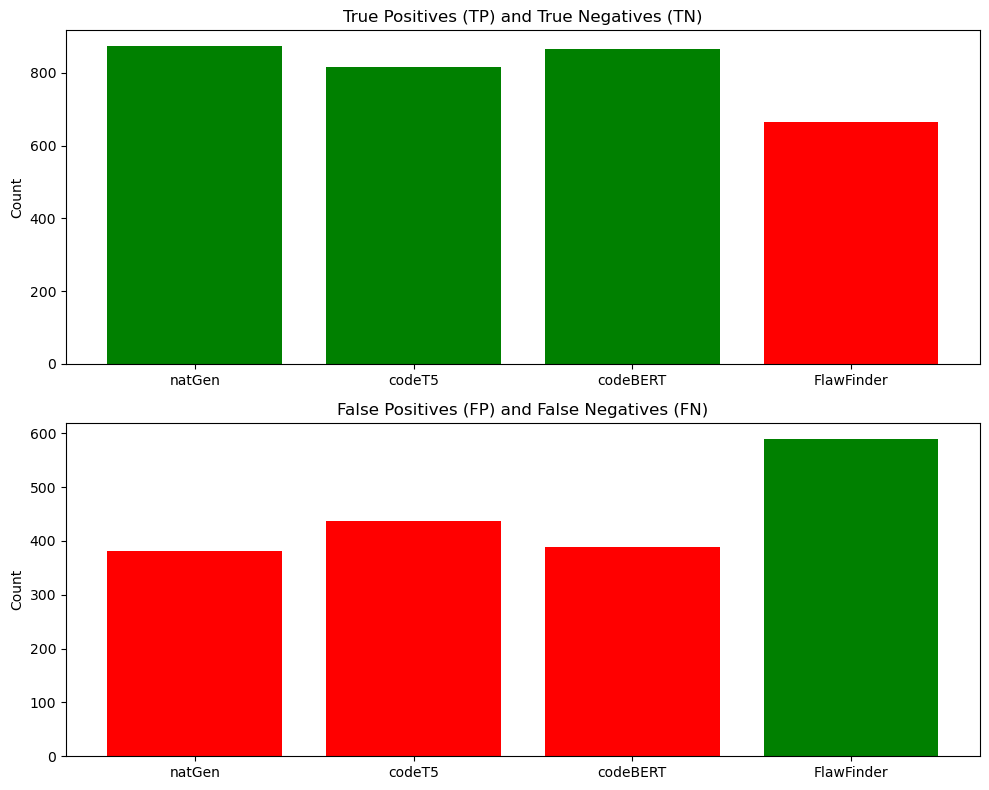

In [42]:
# Definisci la lista dei nomi dei modelli
models = ['natGen', 'codeT5', 'codeBERT', 'FlawFinder']

# Definisci una funzione per calcolare la matrice di confusione per ogni modello
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Definisci una funzione per estrarre i valori TP, TN, FP, FN dalla matrice di confusione
def extract_confusion_values(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tp, tn, fp, fn

# Definisci una funzione per plottare i grafici a barre per TP/TN e FP/FN per ogni modello
def plot_confusion_bar_chart(tp_tn_values, fp_fn_values):
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    
    # Grafico per TP e TN
    axes[0].bar(models, tp_tn_values, color=['green', 'green', 'green', 'red'])
    axes[0].set_title('True Positives (TP) and True Negatives (TN)')
    axes[0].set_ylabel('Count')
    
    # Grafico per FP e FN
    axes[1].bar(models, fp_fn_values, color=['red', 'red', 'red', 'green'])
    axes[1].set_title('False Positives (FP) and False Negatives (FN)')
    axes[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Inizializza le liste per i valori di TP, TN, FP, FN
tp_tn_values = []
fp_fn_values = []

# Calcola e plotta le matrici di confusione per ogni modello
for model in models:
    # Calcola la matrice di confusione
    conf_matrix = calculate_confusion_matrix(df['true'], df[model])
    
    # Estrai i valori TP, TN, FP, FN dalla matrice di confusione
    tp, tn, fp, fn = extract_confusion_values(conf_matrix)
    
    # Aggiungi i valori alle liste
    tp_tn_values.append(tp + tn)
    fp_fn_values.append(fp + fn)

# Plotta i grafici a barre
plot_confusion_bar_chart(tp_tn_values, fp_fn_values)


Numero di True Positive: 562
Numero di True Negative: 65


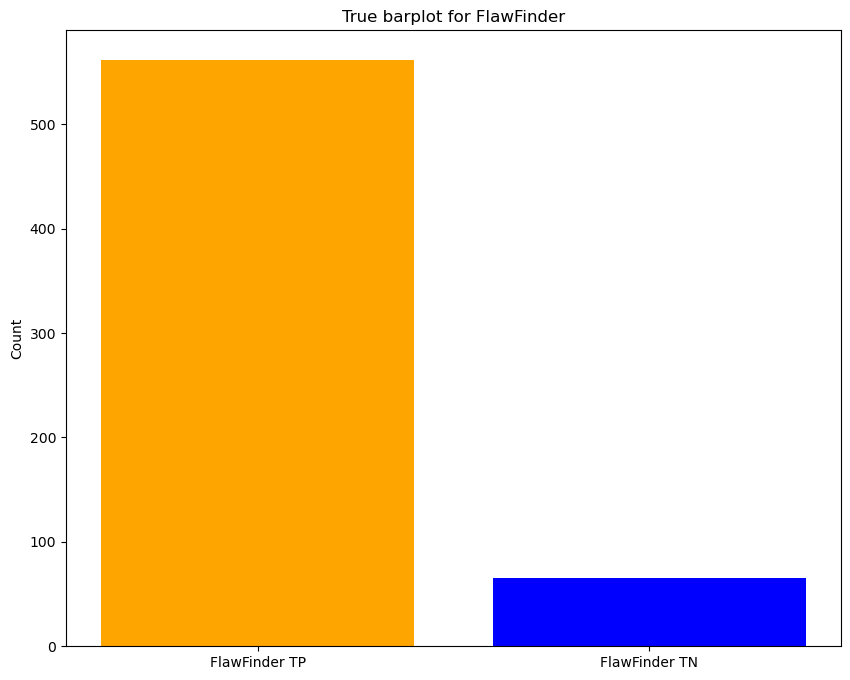

In [43]:
# Calcola la matrice di confusione per FlawFinder
conf_matrix_flawfinder = confusion_matrix(df['true'], df['FlawFinder'])

# Estrai i valori TP, TN, FP, FN dalla matrice di confusione di FlawFinder
tp, tn, fp, fn = conf_matrix_flawfinder.ravel()

# Plotta i grafici a barre per FlawFinder
plt.figure(figsize=(10, 8))

# Barre per Falsi Positivi e Falsi Negativi
plt.bar(['FlawFinder TP'], [tp], color=['orange'], label='FlawFinder TP')
plt.bar(['FlawFinder TN'], [tn], color=['blue'], label='FlawFinder TN')

print("Numero di True Positive:", tp)
print("Numero di True Negative:", tn)

# Mostra il grafico
plt.title('True barplot for FlawFinder')
plt.ylabel('Count')
plt.show()


Numero di False Positive: 525
Numero di False Negative: 102


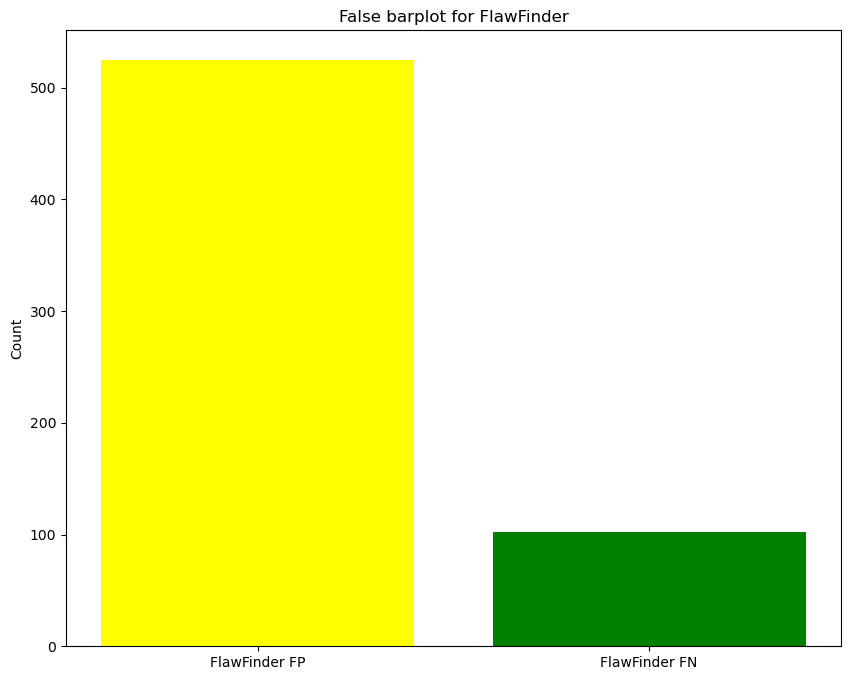

In [44]:
# Plotta i grafici a barre per FlawFinder
plt.figure(figsize=(10, 8))

# Barre per Falsi Positivi e Falsi Negativi
plt.bar(['FlawFinder FP'], [fp], color=['yellow'], label='FlawFinder FP')
plt.bar(['FlawFinder FN'], [fn], color=['green'], label='FlawFinder FN')

print("Numero di False Positive:", fp)
print("Numero di False Negative:", fn)

# Mostra il grafico
plt.title('False barplot for FlawFinder')
plt.ylabel('Count')
plt.show()

Numero di True Positive: 417
Numero di True Negative: 210


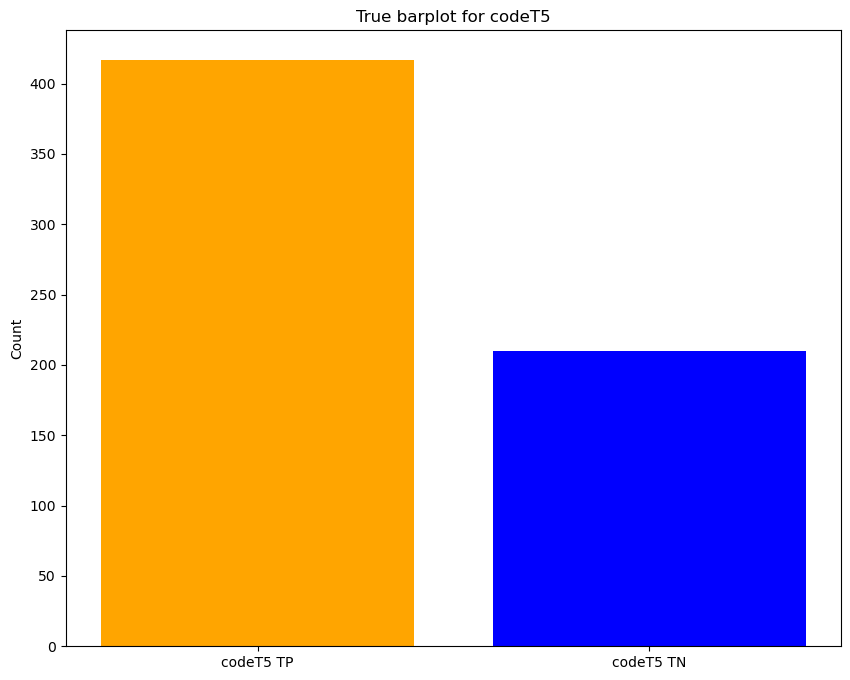

In [45]:
# Calcola la matrice di confusione per FlawFinder
conf_matrix_flawfinder = confusion_matrix(df['true'], df['codeT5'])

# Estrai i valori TP, TN, FP, FN dalla matrice di confusione di FlawFinder
tp, tn, fp, fn = conf_matrix_flawfinder.ravel()

# Plotta i grafici a barre per FlawFinder
plt.figure(figsize=(10, 8))

# Barre per Falsi Positivi e Falsi Negativi
plt.bar(['codeT5 TP'], [tp], color=['orange'], label='codeT5 TP')
plt.bar(['codeT5 TN'], [tn], color=['blue'], label='codeT5 TN')

print("Numero di True Positive:", tp)
print("Numero di True Negative:", tn)

# Mostra il grafico
plt.title('True barplot for codeT5')
plt.ylabel('Count')
plt.show()

Numero di False Positive: 228
Numero di False Negative: 399


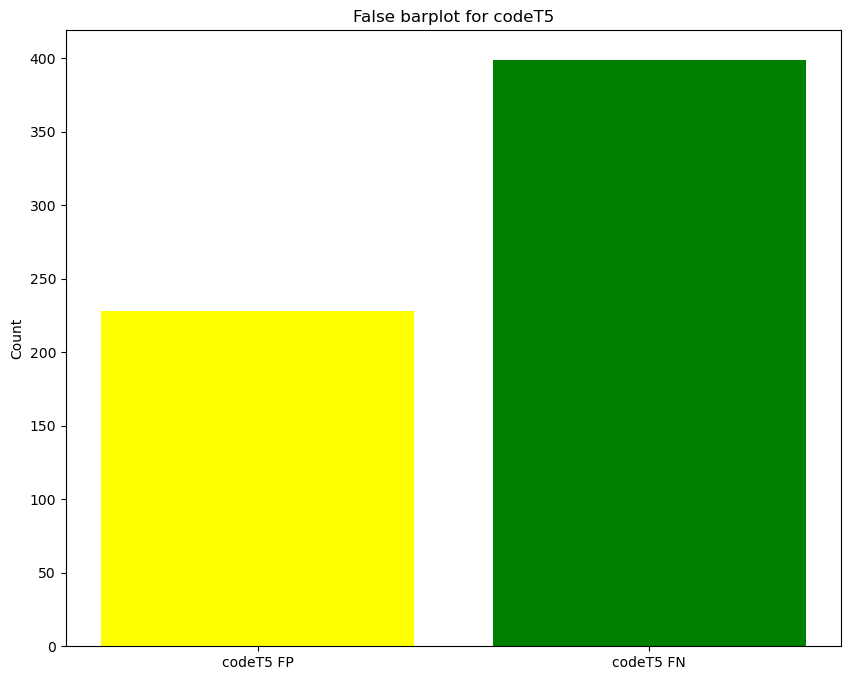

In [46]:
# Plotta i grafici a barre per FlawFinder
plt.figure(figsize=(10, 8))

# Barre per Falsi Positivi e Falsi Negativi
plt.bar(['codeT5 FP'], [fp], color=['yellow'], label='codeT5 FP')
plt.bar(['codeT5 FN'], [fn], color=['green'], label='codeT5 FN')

print("Numero di False Positive:", fp)
print("Numero di False Negative:", fn)

# Mostra il grafico
plt.title('False barplot for codeT5')
plt.ylabel('Count')
plt.show()

Numero di True Positive: 403
Numero di True Negative: 224


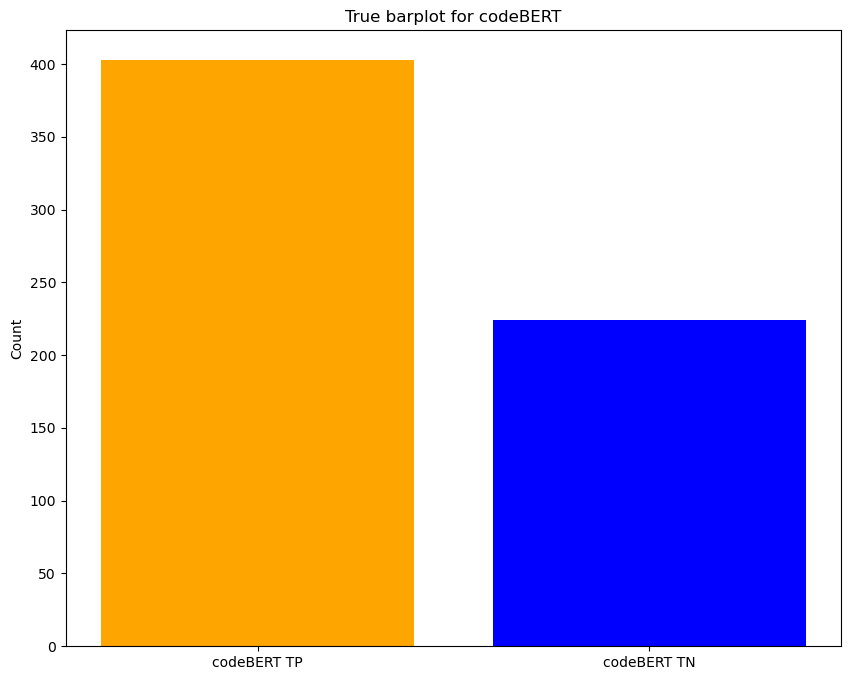

In [47]:
# Calcola la matrice di confusione per FlawFinder
conf_matrix_flawfinder = confusion_matrix(df['true'], df['codeBERT'])

# Estrai i valori TP, TN, FP, FN dalla matrice di confusione di FlawFinder
tp, tn, fp, fn = conf_matrix_flawfinder.ravel()

# Plotta i grafici a barre per FlawFinder
plt.figure(figsize=(10, 8))

# Barre per Falsi Positivi e Falsi Negativi
plt.bar(['codeBERT TP'], [tp], color=['orange'], label='codeBERT TP')
plt.bar(['codeBERT TN'], [tn], color=['blue'], label='codeBERT TN')

print("Numero di True Positive:", tp)
print("Numero di True Negative:", tn)

# Mostra il grafico
plt.title('True barplot for codeBERT')
plt.ylabel('Count')
plt.show()

Numero di False Positive: 165
Numero di False Negative: 462


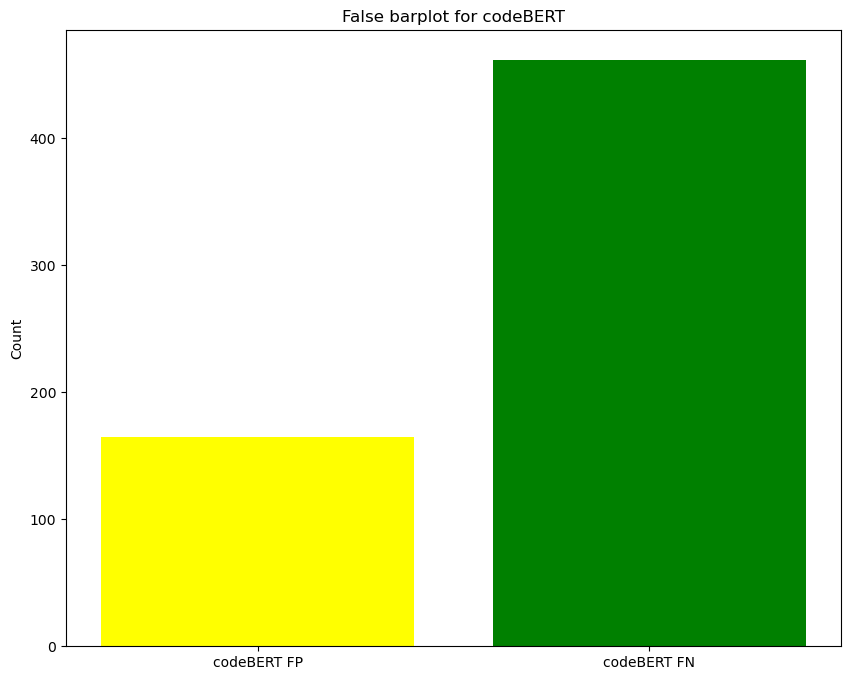

In [48]:
# Plotta i grafici a barre per FlawFinder
plt.figure(figsize=(10, 8))

# Barre per Falsi Positivi e Falsi Negativi
plt.bar(['codeBERT FP'], [fp], color=['yellow'], label='codeBERT FP')
plt.bar(['codeBERT FN'], [fn], color=['green'], label='codeBERT FN')

print("Numero di False Positive:", fp)
print("Numero di False Negative:", fn)

# Mostra il grafico
plt.title('False barplot for codeBERT')
plt.ylabel('Count')
plt.show()

Numero di True Positive: 435
Numero di True Negative: 192


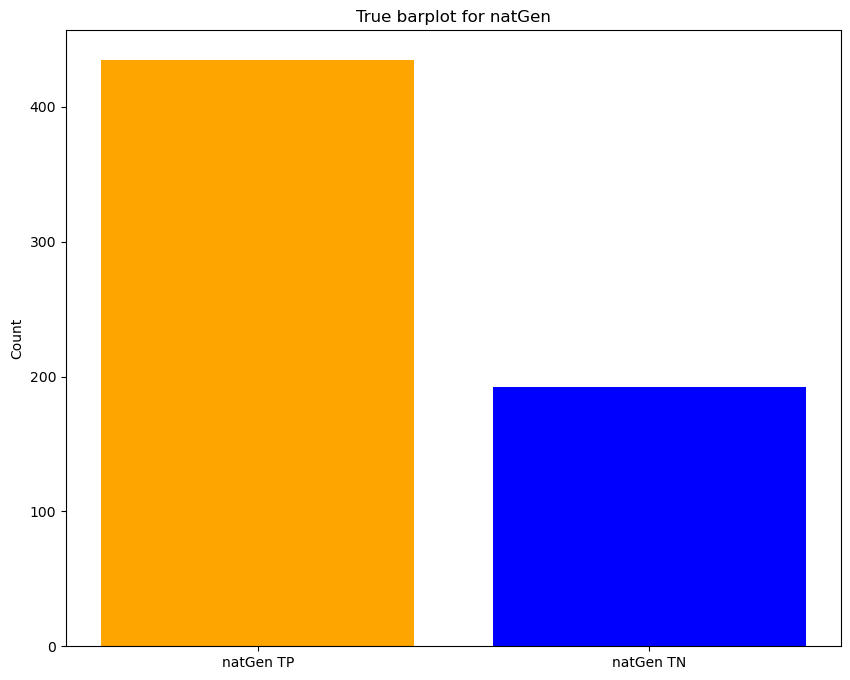

In [49]:
# Calcola la matrice di confusione per FlawFinderconf_matrix_flawfinder = confusion_matrix(df['true'], df['FlawFinder'])
conf_matrix_flawfinder = confusion_matrix(df['true'], df['natGen'])

# Estrai i valori TP, TN, FP, FN dalla matrice di confusione di FlawFinder
tp, tn, fp, fn = conf_matrix_flawfinder.ravel()

# Plotta i grafici a barre per FlawFinder
plt.figure(figsize=(10, 8))

# Barre per Falsi Positivi e Falsi Negativi
plt.bar(['natGen TP'], [tp], color=['orange'], label='natGen TP')
plt.bar(['natGen TN'], [tn], color=['blue'], label='natGen TN')

print("Numero di True Positive:", tp)
print("Numero di True Negative:", tn)

# Mostra il grafico
plt.title('True barplot for natGen')
plt.ylabel('Count')
plt.show()

Numero di False Positive: 189
Numero di False Negative: 438


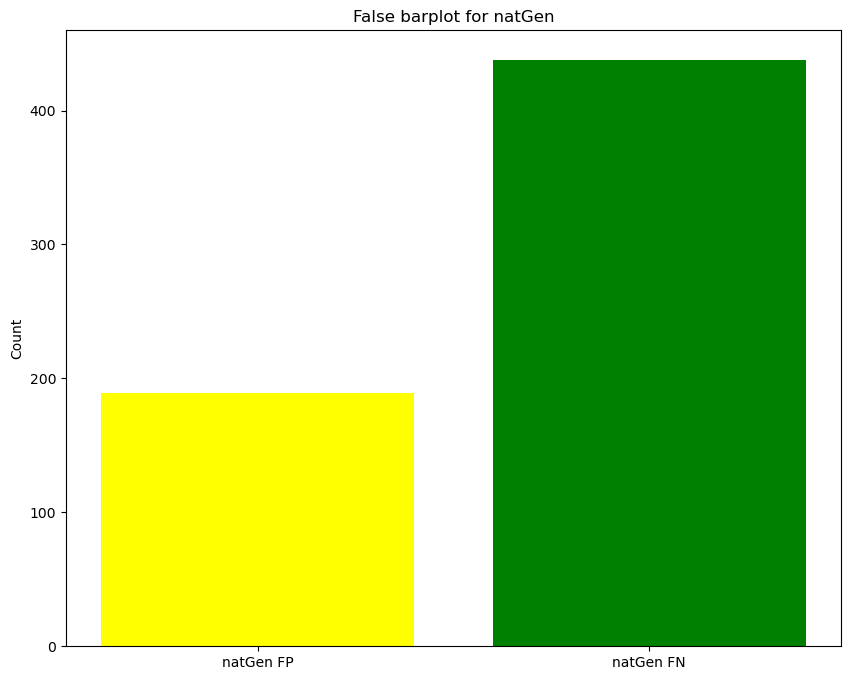

In [50]:
# Plotta i grafici a barre per FlawFinder
plt.figure(figsize=(10, 8))

# Barre per Falsi Positivi e Falsi Negativi
plt.bar(['natGen FP'], [fp], color=['yellow'], label='natGen FP')
plt.bar(['natGen FN'], [fn], color=['green'], label='natGen FN')

print("Numero di False Positive:", fp)
print("Numero di False Negative:", fn)

# Mostra il grafico
plt.title('False barplot for natGen')
plt.ylabel('Count')
plt.show()